# Solutions to CNN Sattelite Predictions, Part 1

This is the solution to increasing the performance of the model from the CNN in part 1 of the land use classification tutorial. The solution is presented as an interactive exploration of the code, where some of the code is reformatted into separate files so that we can call them multiple times for our different model iterations. 

You can safely skip the following few cells as they are just for setting up the environment and loading the data.

In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchsummary import summary
from sklearn.model_selection import train_test_split

from scripts.train import train
from scripts.data_loader import load_data, load_images, calculate_mean_std, transform_data

In [2]:
# Check if CUDA is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [3]:
image_paths, labels, num_classes, label_mapping = load_data(800)

# Split the data (adjust the test_size according to your needs)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.30, random_state=42)

val_paths, test_paths, val_labels, test_labels = train_test_split(
    test_paths, test_labels, test_size=0.5, random_state=42)

train_dataset, val_dataset, test_dataset = transform_data(train_paths, train_labels, val_paths, val_labels, test_paths, test_labels)

# Create DataLoaders of size 64
train_loader64 = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader64 = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader64 = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Create DataLoaders of size 32
train_loader32 = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader32 = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader32 = DataLoader(test_dataset, batch_size=32, shuffle=False)

Loaded 800 images, with 21 different classes.


Loading images: 100%|██████████| 120/120 [00:00<00:00, 628.17it/s]


# Where can we go from here?
Let's first run the basic model, provided CNN from part 1 to benchmark our performance. Note how the model is defined in the `models` folder and imported here. This is to keep the code clean and modular.

In [4]:
from models.BasicCNN import BasicCNN

modelBasic = BasicCNN(num_classes=num_classes).to(device) # import the basic model
# summary(model, input_size=(3, 224, 224)) 

# train the basic model
path_basic = '../models/best_basic_model.pth'
training_losses, validation_losses, validation_accuracies = train(modelBasic, train_loader64, val_loader64, device, path_basic, num_epochs=10)

Epoch 1: Improved validation accuracy to 1.67%. Model saved.
Epoch 1/10 Train Loss: 3.0203, Validation Loss: 3.0074, Accuracy: 1.67%
Epoch 2: Improved validation accuracy to 10.00%. Model saved.
Epoch 2/10 Train Loss: 2.8369, Validation Loss: 2.8873, Accuracy: 10.00%
Epoch 3: Improved validation accuracy to 13.33%. Model saved.
Epoch 3/10 Train Loss: 2.6910, Validation Loss: 2.6830, Accuracy: 13.33%
Epoch 4: Improved validation accuracy to 20.00%. Model saved.
Epoch 4/10 Train Loss: 2.4309, Validation Loss: 2.5043, Accuracy: 20.00%
Epoch 5: Improved validation accuracy to 27.50%. Model saved.
Epoch 5/10 Train Loss: 2.1950, Validation Loss: 2.3507, Accuracy: 27.50%
Epoch 6/10 Train Loss: 2.0362, Validation Loss: 2.5149, Accuracy: 21.67%
Epoch 7: Improved validation accuracy to 31.67%. Model saved.
Epoch 7/10 Train Loss: 1.8933, Validation Loss: 2.0575, Accuracy: 31.67%
Epoch 8/10 Train Loss: 1.5915, Validation Loss: 2.0596, Accuracy: 31.67%
Epoch 9: Improved validation accuracy to 35.00

As we see, it's not that great. What can we do to improve it? Some very basic ideas are:
- Change the kernel size (it is currently all 3)
- Change the number of layers
- Change the number of channels

Let's start off by simply changing the kernel size to 5 and see what happens.

In [5]:
from models.BasicCNN2 import BasicCNN2 # import the changed model, go check it out in the models folder

model = BasicCNN2(num_classes=num_classes).to(device)
# summary(model, input_size=(3, 224, 224))

path_basic2 = '../models/best_basic_model2.pth'
training_losses2, validation_losses2, validation_accuracies2 = train(model, train_loader64, val_loader64, device, path_basic2, num_epochs=10)

Epoch 1: Improved validation accuracy to 1.67%. Model saved.
Epoch 1/10 Train Loss: 3.0119, Validation Loss: 3.2140, Accuracy: 1.67%
Epoch 2: Improved validation accuracy to 6.67%. Model saved.
Epoch 2/10 Train Loss: 2.9418, Validation Loss: 2.9098, Accuracy: 6.67%
Epoch 3: Improved validation accuracy to 10.00%. Model saved.
Epoch 3/10 Train Loss: 2.7178, Validation Loss: 2.6862, Accuracy: 10.00%
Epoch 4: Improved validation accuracy to 18.33%. Model saved.
Epoch 4/10 Train Loss: 2.4377, Validation Loss: 2.6039, Accuracy: 18.33%
Epoch 5/10 Train Loss: 2.2336, Validation Loss: 2.5974, Accuracy: 15.83%
Epoch 6: Improved validation accuracy to 36.67%. Model saved.
Epoch 6/10 Train Loss: 1.9854, Validation Loss: 2.0559, Accuracy: 36.67%
Epoch 7/10 Train Loss: 1.8261, Validation Loss: 2.1075, Accuracy: 36.67%
Epoch 8/10 Train Loss: 1.7237, Validation Loss: 2.0132, Accuracy: 34.17%
Epoch 9: Improved validation accuracy to 38.33%. Model saved.
Epoch 9/10 Train Loss: 1.4209, Validation Loss: 

# Changing the Architecture
We see that these small changes affect the model, so let's investigate them in a more structured manner by changing the architecture of the CNN. Remember that there are a few basic architectures, such as:
- LeNet
- AlexNet
- VGG
- ResNet

We will try out LeNet and AlexNet, and see which one performs better. 


In [6]:
from models.LeNet import LeNet

# import the LeNet model
model = LeNet(num_classes=num_classes).to(device)
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 6, 224, 224]             456
         MaxPool2d-2          [-1, 6, 112, 112]               0
            Conv2d-3         [-1, 16, 112, 112]           2,416
         MaxPool2d-4           [-1, 16, 56, 56]               0
            Linear-5                  [-1, 120]       6,021,240
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 21]           1,785
Total params: 6,036,061
Trainable params: 6,036,061
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 4.79
Params size (MB): 23.03
Estimated Total Size (MB): 28.39
----------------------------------------------------------------


We can see quite the increase in number of parameters, though it is still reasonable for our purposes. Let's train it and see how it performs.

In [7]:
# train the model
path = '../models/best_lenet_model.pth'
training_losses4, validation_losses4, validation_accuracies4 = train(model, train_loader64, val_loader64, device, path, num_epochs=10)

Epoch 1: Improved validation accuracy to 6.67%. Model saved.
Epoch 1/10 Train Loss: 3.2341, Validation Loss: 3.0032, Accuracy: 6.67%
Epoch 2: Improved validation accuracy to 9.17%. Model saved.
Epoch 2/10 Train Loss: 2.9414, Validation Loss: 2.9723, Accuracy: 9.17%
Epoch 3: Improved validation accuracy to 15.83%. Model saved.
Epoch 3/10 Train Loss: 2.7819, Validation Loss: 2.8395, Accuracy: 15.83%
Epoch 4: Improved validation accuracy to 24.17%. Model saved.
Epoch 4/10 Train Loss: 2.4349, Validation Loss: 2.5644, Accuracy: 24.17%
Epoch 5/10 Train Loss: 1.8692, Validation Loss: 2.4956, Accuracy: 24.17%
Epoch 6: Improved validation accuracy to 30.00%. Model saved.
Epoch 6/10 Train Loss: 1.3955, Validation Loss: 2.5344, Accuracy: 30.00%
Epoch 7: Improved validation accuracy to 37.50%. Model saved.
Epoch 7/10 Train Loss: 0.8512, Validation Loss: 2.4284, Accuracy: 37.50%
Epoch 8/10 Train Loss: 0.5030, Validation Loss: 2.6938, Accuracy: 31.67%
Epoch 9/10 Train Loss: 0.3062, Validation Loss: 

In [8]:
from models.AlexNet import AlexNet

# import the improved model
model = AlexNet(num_classes=num_classes).to(device)
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
         MaxPool2d-2           [-1, 96, 27, 27]               0
            Conv2d-3          [-1, 256, 27, 27]         614,656
         MaxPool2d-4          [-1, 256, 13, 13]               0
            Conv2d-5          [-1, 384, 13, 13]         885,120
            Conv2d-6          [-1, 384, 13, 13]       1,327,488
            Conv2d-7          [-1, 256, 13, 13]         884,992
         MaxPool2d-8            [-1, 256, 6, 6]               0
            Linear-9                 [-1, 4096]      37,752,832
           Linear-10                 [-1, 4096]      16,781,312
           Linear-11                   [-1, 21]          86,037
Total params: 58,367,381
Trainable params: 58,367,381
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Fo

Now, AlexNet is drastically bigger, possibly even too big for our small tutorial. Let's see how it does with just 10 epochs.

In [9]:
# train the basic model
path = '../models/best_alexnet_model.pth'
training_losses5, validation_losses5, validation_accuracies5 = train(model, train_loader64, val_loader64, device, path, num_epochs=10)

Epoch 1: Improved validation accuracy to 9.17%. Model saved.
Epoch 1/10 Train Loss: 3.7204, Validation Loss: 3.0359, Accuracy: 9.17%
Epoch 2/10 Train Loss: 3.0298, Validation Loss: 3.0256, Accuracy: 2.50%
Epoch 3: Improved validation accuracy to 10.00%. Model saved.
Epoch 3/10 Train Loss: 2.9827, Validation Loss: 2.9701, Accuracy: 10.00%
Epoch 4/10 Train Loss: 2.9199, Validation Loss: 2.8633, Accuracy: 7.50%
Epoch 5: Improved validation accuracy to 16.67%. Model saved.
Epoch 5/10 Train Loss: 2.7601, Validation Loss: 2.6511, Accuracy: 16.67%
Epoch 6/10 Train Loss: 2.6456, Validation Loss: 2.6635, Accuracy: 11.67%
Epoch 7/10 Train Loss: 2.4392, Validation Loss: 2.5315, Accuracy: 15.83%
Epoch 8: Improved validation accuracy to 22.50%. Model saved.
Epoch 8/10 Train Loss: 2.3838, Validation Loss: 2.3598, Accuracy: 22.50%
Epoch 9/10 Train Loss: 2.3173, Validation Loss: 2.2673, Accuracy: 18.33%
Epoch 10/10 Train Loss: 2.1328, Validation Loss: 2.2533, Accuracy: 21.67%


# We can do better
Neither increased performance by that much, and AlexNet was especially underwhelming. What can we do?

One clue might be that both LeNet and AlexNet have more parameters to train, and thus require a smaller learning rate, more number of epochs, and more data. Due to AlexNet's large amount of parameters, for the sake of this tutorial we will move on with LeNet for finding a lightweight model with good performance.

In [10]:
LeNetModel = LeNet(num_classes=num_classes).to(device)
# summary(LeNetModel, input_size=(3, 224, 224))

# train the basic model
path = '../models/best_lenet_2.pth'
training_losses6, validation_losses6, validation_accuracies6 = train(LeNetModel, train_loader64, val_loader64, device, path, num_epochs=40, lr=0.00005)


Epoch 1: Improved validation accuracy to 2.50%. Model saved.
Epoch 1/40 Train Loss: 3.0290, Validation Loss: 3.0008, Accuracy: 2.50%
Epoch 2: Improved validation accuracy to 6.67%. Model saved.
Epoch 2/40 Train Loss: 2.9642, Validation Loss: 2.9597, Accuracy: 6.67%
Epoch 3: Improved validation accuracy to 7.50%. Model saved.
Epoch 3/40 Train Loss: 2.8969, Validation Loss: 2.9021, Accuracy: 7.50%
Epoch 4: Improved validation accuracy to 14.17%. Model saved.
Epoch 4/40 Train Loss: 2.8249, Validation Loss: 2.8469, Accuracy: 14.17%
Epoch 5: Improved validation accuracy to 17.50%. Model saved.
Epoch 5/40 Train Loss: 2.7360, Validation Loss: 2.7835, Accuracy: 17.50%
Epoch 6: Improved validation accuracy to 20.00%. Model saved.
Epoch 6/40 Train Loss: 2.6483, Validation Loss: 2.7280, Accuracy: 20.00%
Epoch 7: Improved validation accuracy to 22.50%. Model saved.
Epoch 7/40 Train Loss: 2.5435, Validation Loss: 2.6474, Accuracy: 22.50%
Epoch 8: Improved validation accuracy to 23.33%. Model saved.

In [12]:
BasicCNN2Model = BasicCNN2(num_classes=num_classes).to(device)
# summary(LeNetModel, input_size=(3, 224, 224))

# train the basic model
path = '../models/best_basiccnn2_2.pth'
training_losses3, validation_losses3, validation_accuracies3 = train(BasicCNN2Model, train_loader64, val_loader64, device, path, num_epochs=20, lr=0.0005)


Epoch 1: Improved validation accuracy to 3.33%. Model saved.
Epoch 1/20 Train Loss: 3.0266, Validation Loss: 3.0154, Accuracy: 3.33%
Epoch 2: Improved validation accuracy to 9.17%. Model saved.
Epoch 2/20 Train Loss: 2.8974, Validation Loss: 2.8532, Accuracy: 9.17%
Epoch 3/20 Train Loss: 2.7364, Validation Loss: 2.7298, Accuracy: 8.33%
Epoch 4: Improved validation accuracy to 17.50%. Model saved.
Epoch 4/20 Train Loss: 2.4965, Validation Loss: 2.5773, Accuracy: 17.50%
Epoch 5/20 Train Loss: 2.2552, Validation Loss: 2.4452, Accuracy: 17.50%
Epoch 6: Improved validation accuracy to 28.33%. Model saved.
Epoch 6/20 Train Loss: 1.9592, Validation Loss: 2.2643, Accuracy: 28.33%
Epoch 7: Improved validation accuracy to 38.33%. Model saved.
Epoch 7/20 Train Loss: 1.6493, Validation Loss: 2.0125, Accuracy: 38.33%
Epoch 8/20 Train Loss: 1.3706, Validation Loss: 2.0694, Accuracy: 37.50%
Epoch 9/20 Train Loss: 1.1657, Validation Loss: 2.0567, Accuracy: 37.50%
Epoch 10/20 Train Loss: 1.1658, Valida

# Evaluating the Results
There's already a difference, and we get to 50%+ accuracy even with only 800 data samples. As we see, there are many things we can do to improve the performance of our classifier. Let's plot the results to see if we're ready to scale it up on the entire data set!

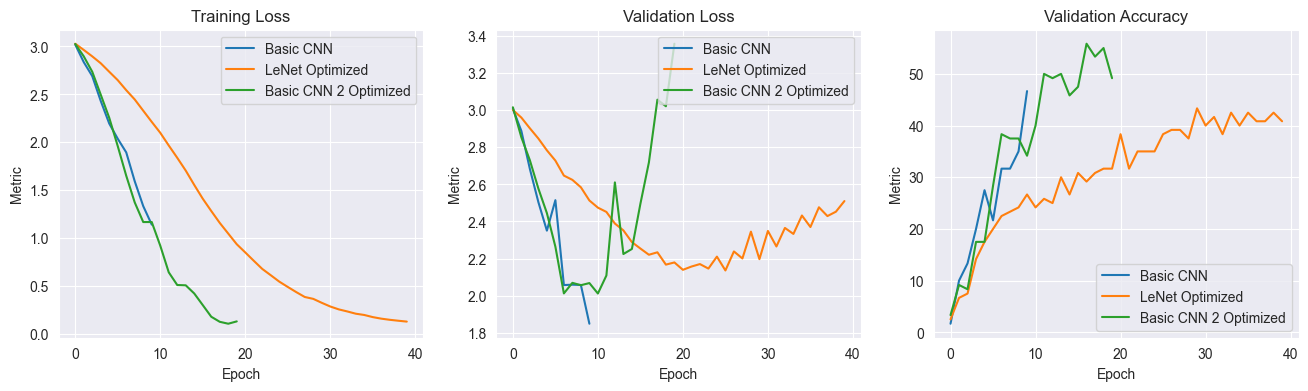

In [13]:
import matplotlib.pyplot as plt

# plot three subplots: training loss, validation loss, and validation accuracy
fig, axs = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 3 columns

# plot Basic CNN, Basic CNN 2 optimized, and LeNet optimized, and AlexNet optimized
axs[0].plot(training_losses, label='Basic CNN')
axs[0].plot(training_losses6, label='LeNet Optimized')
axs[0].plot(training_losses3, label='Basic CNN 2 Optimized')
axs[0].set_title('Training Loss')

axs[1].plot(validation_losses, label='Basic CNN')
axs[1].plot(validation_losses6, label='LeNet Optimized')
axs[1].plot(validation_losses3, label='Basic CNN 2 Optimized')
axs[1].set_title('Validation Loss')

axs[2].plot(validation_accuracies, label='Basic CNN')
axs[2].plot(validation_accuracies6, label='LeNet Optimized')
axs[2].plot(validation_accuracies3, label='Basic CNN 2 Optimized')
axs[2].set_title('Validation Accuracy')

for ax in axs:
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Metric')
    ax.legend()
    
# Show results
plt.show()


# Evaluating Other Metrics
We can also evaluate other metrics, such as F1 score, precision, and recall. Let's do that for the best models we have so far, the LetNet Optimized and BasicCNN2. We begin by testing it on the test set.

In [14]:
from scripts.test import test
# Get test accuracy
print("LeNet Optimized")
test(LeNetModel, test_loader64, device) # prints the results

print("Basic CNN 2 Optimized")
test(BasicCNN2Model, test_loader64, device) # prints the results


LeNet Optimized
Test Loss: 5.8526 Accuracy: 35.00%
Basic CNN 2 Optimized
Test Loss: 7.7941 Accuracy: 38.33%


In [15]:
# Get F1 score, precision, and recall on test set
from sklearn.metrics import f1_score, precision_score, recall_score

# get f1 score
y_true_ln, y_pred_ln = [], []
for images, labels in test_loader64:
    images, labels = images.to(device), labels.to(device)
    outputs = LeNetModel(images)
    _, predicted = torch.max(outputs.data, 1)
    y_true_ln.extend(labels.cpu().numpy())
    y_pred_ln.extend(predicted.cpu().numpy())
    
f1_ln = f1_score(y_true_ln, y_pred_ln, average='weighted')
precision_ln = precision_score(y_true_ln, y_pred_ln, average='weighted')
recall_ln = recall_score(y_true_ln, y_pred_ln, average='weighted')

print("LeNet Optimized")
print(f'F1 score: {f1_ln:.4f}')
print(f'Precision: {precision_ln:.4f}')
print(f'Recall: {recall_ln:.4f}')

# get f1 score
y_true_b2, y_pred_b2 = [], []
for images, labels in test_loader64:
    images, labels = images.to(device), labels.to(device)
    outputs = BasicCNN2Model(images)
    _, predicted = torch.max(outputs.data, 1)
    y_true_b2.extend(labels.cpu().numpy())
    y_pred_b2.extend(predicted.cpu().numpy())

f1_b2 = f1_score(y_true_b2, y_pred_b2, average='weighted')
precision_b2 = precision_score(y_true_b2, y_pred_b2, average='weighted')
recall_b2 = recall_score(y_true_b2, y_pred_b2, average='weighted')

print("Basic CNN 2 Optimized")
print(f'F1 score: {f1_b2:.4f}')
print(f'Precision: {precision_b2:.4f}')
print(f'Recall: {recall_b2:.4f}')

C:\Users\sosty\anaconda3\envs\scientificProject\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LeNet Optimized
F1 score: 0.3327
Precision: 0.3386
Recall: 0.3500
Basic CNN 2 Optimized
F1 score: 0.3865
Precision: 0.4737
Recall: 0.3833


Let's plot a confusion matrix to see what is most often misclassified.

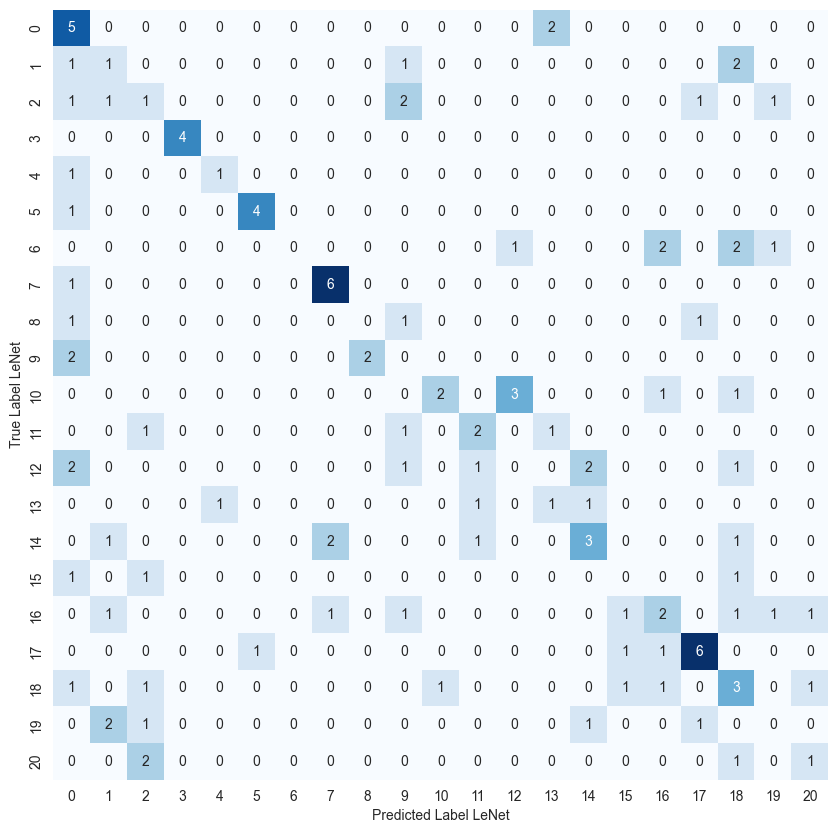

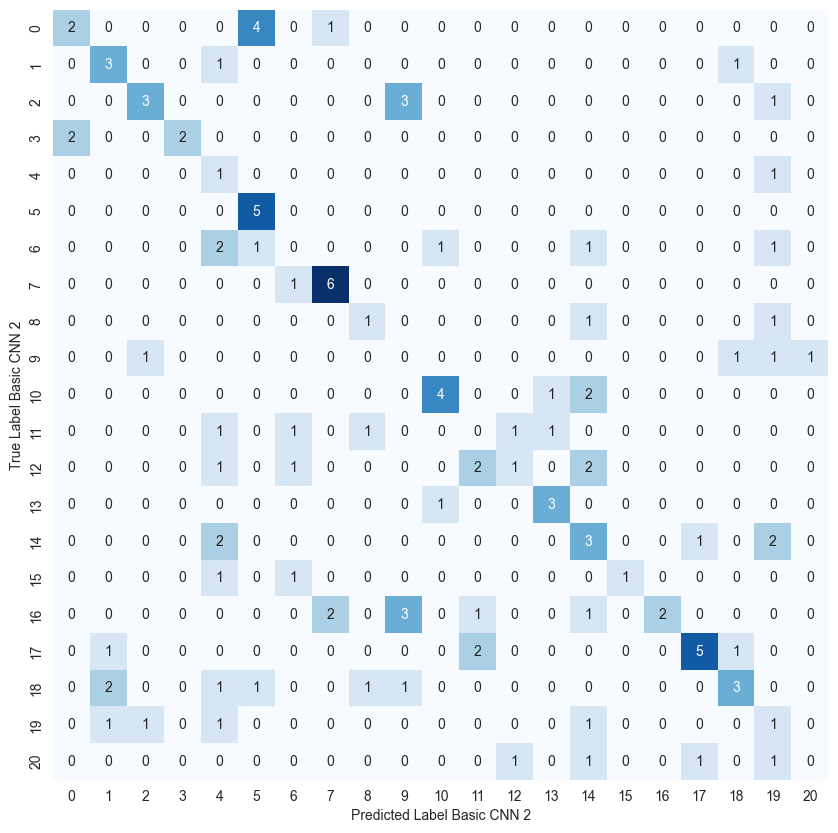

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get confusion matrix
cm_ln = confusion_matrix(y_true_ln, y_pred_ln)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_ln, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label LeNet')
plt.ylabel('True Label LeNet')
plt.show()

# Get confusion matrix
cm_b2 = confusion_matrix(y_true_b2, y_pred_b2)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_b2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label Basic CNN 2')
plt.ylabel('True Label Basic CNN 2')
plt.show()

# Scaling it Up
Let's scale this model up on the entire data set and see how it performs. We will use the LeNet model, as it had the best balance of size and performance while staying stable which is perfect for our needs.

In [17]:
image_paths, labels, num_classes, label_mapping = load_data(-1) # entire dataset

# Split the data (adjust the test_size according to your needs)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.30, random_state=42)

val_paths, test_paths, val_labels, test_labels = train_test_split(
    test_paths, test_labels, test_size=0.5, random_state=42)

train_dataset, val_dataset, test_dataset = transform_data(train_paths, train_labels, val_paths, val_labels, test_paths, test_labels)

# Create DataLoaders of size 64
train_loader64 = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader64 = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader64 = DataLoader(test_dataset, batch_size=64, shuffle=False)

Loaded 2100 images, with 21 different classes.


Loading images: 100%|██████████| 315/315 [00:08<00:00, 36.65it/s]


In [18]:
LeNetModel = LeNet(num_classes=num_classes).to(device)
summary(model, input_size=(3, 224, 224))

# train the basic model
path = '../models/alexnet_best_of_the_best.pth'
training_losses7, validation_losses7, validation_accuracies7 = train(LeNetModel, train_loader64, val_loader64, device, path, num_epochs=15, lr=0.00005)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
         MaxPool2d-2           [-1, 96, 27, 27]               0
            Conv2d-3          [-1, 256, 27, 27]         614,656
         MaxPool2d-4          [-1, 256, 13, 13]               0
            Conv2d-5          [-1, 384, 13, 13]         885,120
            Conv2d-6          [-1, 384, 13, 13]       1,327,488
            Conv2d-7          [-1, 256, 13, 13]         884,992
         MaxPool2d-8            [-1, 256, 6, 6]               0
            Linear-9                 [-1, 4096]      37,752,832
           Linear-10                 [-1, 4096]      16,781,312
           Linear-11                   [-1, 21]          86,037
Total params: 58,367,381
Trainable params: 58,367,381
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Fo

# Evaluating the Results
Let's plot the results to see how it performs on the entire data set. We will also print the test accuracy, F1 score, precision, and recall.

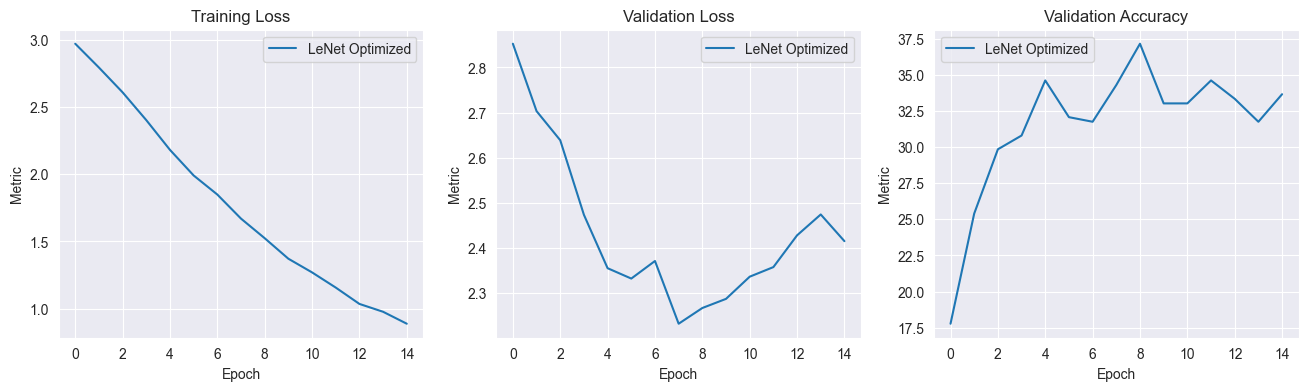

In [19]:
import matplotlib.pyplot as plt

# Plot three subplots: training loss, validation loss, and validation accuracy for ALexNet and BasicCNN2
fig, axs = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 3 columns

axs[0].plot(training_losses7, label='LeNet Optimized')
axs[0].set_title('Training Loss')

axs[1].plot(validation_losses7, label='LeNet Optimized')
axs[1].set_title('Validation Loss')

axs[2].plot(validation_accuracies7, label='LeNet Optimized')
axs[2].set_title('Validation Accuracy')

for ax in axs:
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Metric')
    ax.legend()
    
# Show results
plt.show()

Let's print the test accuracy, F1 score, precision, and recall.

In [20]:
# Get test accuracy
test(LeNetModel, test_loader64, device) # prints the results

# Get F1 score, precision, and recall on test set
y_true, y_pred = [], []
for images, labels in test_loader64:
    images, labels = images.to(device), labels.to(device)
    outputs = LeNetModel(images)
    _, predicted = torch.max(outputs.data, 1)
    y_true.extend(labels.cpu().numpy())
    y_pred.extend(predicted.cpu().numpy())
    
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f'F1 score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Test Loss: 10.3121 Accuracy: 39.37%
F1 score: 0.3847
Precision: 0.4174
Recall: 0.3937


# Concluding Remarks
There are many ways to find a better model, and we have only scratched the surface. Some ideas are:
- Train for more epochs
- Train a larger model
- Train a ResNet

There are also many ways to improve the data set with data augmentation that we will explore in part 2 of this tutorial. This part 1 is to show the intuition behind finding a good model, and how to do it in a structured manner.